In [196]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("lixin/", one_hot=True)

Extracting lixin/train-images-idx3-ubyte.gz
Extracting lixin/train-labels-idx1-ubyte.gz
Extracting lixin/t10k-images-idx3-ubyte.gz
Extracting lixin/t10k-labels-idx1-ubyte.gz


In [399]:
# Network Parameters 
n_input = 784
hidden_layer_neurons = 300
n_classes = 10

# Training Parameters
learning_rate = 1.6
training_epochs = 30000
batch_size = 50

In [400]:
# x and y placeholders
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
# Create weights and biases that will be used in the neural network
w1 = tf.Variable(tf.random_normal([n_input, hidden_layer_neurons]))
w2 = tf.Variable(tf.random_normal([hidden_layer_neurons, n_classes]))
b1 = tf.Variable(tf.random_normal([hidden_layer_neurons]))
b2 = tf.Variable(tf.random_normal([n_classes]))
# The multilayer perceptron model
hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1))
output_layer = tf.add(tf.matmul(hidden_layer, w2), b2)

In [401]:
# Cost funcition and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [402]:
# Define the Test model and accuracy
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
correct_prediction = tf.cast(correct_prediction, "float")
accuracy = tf.reduce_mean(correct_prediction)

In [403]:
# Launch the session
sess = tf.InteractiveSession()

# Initialize variables
init = tf.global_variables_initializer()

# Start session
sess.run(init)

In [404]:
# Accuracies arrays to create a plot
train_accuracies = []
validation_accuracies = []
epoc_iteration = []

# Run the session, save the accuracies
for epoch in range(training_epochs):    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    if (epoch+1) < 100 or (epoch+1) % 100 == 0:
        train_ac = accuracy.eval({x: batch_x, y: batch_y})
        validation_ac = accuracy.eval({x: mnist.validation.images, 
                                       y: mnist.validation.labels})
        epoc_iteration.append(epoch+1)
        train_accuracies.append(train_ac)
        validation_accuracies.append(validation_ac)
    sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

Text(0.5,1,u'Training and Validation accuracy')

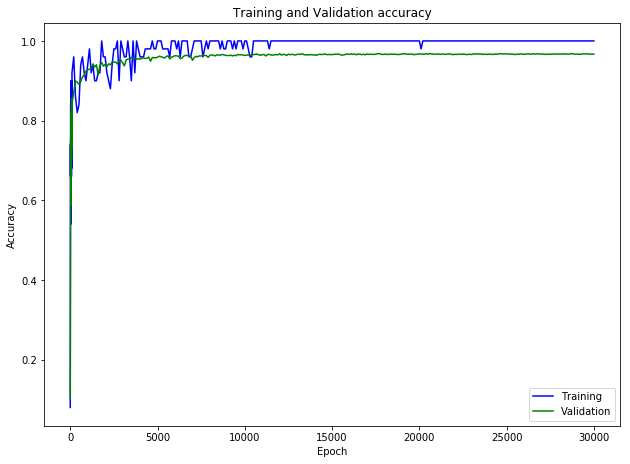

In [405]:
fig = plt.figure(figsize=(10,7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot full graph
axes1.plot(epoc_iteration, train_accuracies,'-b', label='Training')
axes1.plot(epoc_iteration, validation_accuracies,'-g', label='Validation')
axes1.legend()
axes1.set_xlabel('Epoch')
axes1.set_ylabel('Accuracy')
axes1.set_title('Training and Validation accuracy')

In [406]:
# Print final accuracies
print("Validation Accuracy:", accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels}))
print("Test Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Validation Accuracy: 0.967
Test Accuracy: 0.9645
